In [1]:
import os
from scipy.io import loadmat, savemat
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import seaborn

from time import time

In [2]:
path = 'D:\\spm_data\\SPM_DATA\\prep2\\stat' #'C:\\SPM_DATA\\prep2\\stat'

In [3]:
r = [len([i for i in os.listdir(f'{path}\\{p}') if i[-4:] == '.mat' and i[:3] == 'VOI']) for p in os.listdir(path)]

In [3]:
def find_zeros(path):
    files = [i for i in os.listdir(path) if i[:3] == 'VOI']
    c=[]
    for i in range(1, 427):
        if len(str(i)) == 1:
            ind = f'00{i}'
        elif len(str(i)) == 2:
            ind = f'0{i}'
        else:
            ind = str(i)

        temp = [d for d in files if d[:7] == f'VOI_{ind}']
        ch = [d for d in temp if d[-4:] == '.mat']
        if len(ch) == 0:
            c.append(ind)
    return c

In [4]:
missing = []
for i in os.listdir('C:\\SPM_DATA\\prep2\\stat'):
    missing.append(find_zeros(f'C:\\SPM_DATA\\prep2\\stat\\{i}'))

In [6]:
from collections import Counter
to_delete = Counter([item for sublist in missing for item in sublist])

In [8]:
to_delete.keys()

dict_keys(['337', '372', '396', '151', '336', '331'])

In [2]:
import pandas as pd
sorted_rois = pd.read_excel('C:\\Users\\user\\Downloads\\Telegram Desktop\\sorted_HCPex.xlsx')

In [3]:
sorted_rois.head()

,Index,ID,Label,Cortical Division,R,G,B
0,0,1,Primary_Visual_Cortex_L,Primary_Visual,208,216,117
1,1,181,Primary_Visual_Cortex_R,Primary_Visual,208,216,117
2,2,2,Second_Visual_Area_L,Early_Visual,231,50,224
3,3,182,Second_Visual_Area_R,Early_Visual,231,50,224
4,4,3,Third_Visual_Area_L,Early_Visual,33,58,133


In [4]:
path = 'D:\\HCPex'
sorted_path = 'D:\\HCPex_sorted'

In [11]:
import shutil

files = os.listdir(path)

for en, i in enumerate(sorted_rois.Label):
    for t in files:
        if i in t:
            shutil.copy(f'{path}\\{t}', f'{sorted_path}\\{en+1:03d}_{i}.nii')


In [ ]:
[sorted_rois.loc[i].Index for i in range(len(sorted_rois)) if sorted_rois.loc[i].ID in [337, 372, 396, 151, 336, 331]]

In [13]:
#sorted_rois.drop(index=[300, 301, 311, 313, 365, 382], inplace=True)
sorted_rois.ID - 1

0        0
1      180
2        1
3      181
4        2
      ... 
421    423
422    391
423    424
424    392
425    425
Name: ID, Length: 420, dtype: int64

In [6]:
to_delete = ['337', '372', '396', '151', '336', '331']

In [9]:
ts_1 = [i for i in os.listdir(f'{path}//046_sub') if i[-5:] == '1.mat' and i[:3] == 'VOI' and i[4:7] not in to_delete]
#ts_2 = [i for i in os.listdir(path) if i[-5:] == '2.mat' and i[:3] == 'VOI' and i[4:7] not in to_delete]

In [34]:
ts_1_sorted = np.zeros(420, dtype=object)
for en, i in enumerate(sorted_rois.ID):
    for t in ts_1:
        if t[4:7] == f'{i:03d}':
            #print(f'{i:03d}')
            ts_1_sorted[en] = t



In [ ]:
ts_1_sorted

In [36]:
ts_2 = [i for i in os.listdir(f'{path}//046_sub') if i[-5:] == '2.mat' and i[:3] == 'VOI' and i[4:7] not in to_delete]
ts_2_sorted = np.zeros(420, dtype=object)
for en, i in enumerate(sorted_rois.ID):
    for t in ts_2:
        if t[4:7] == f'{i:03d}':
            #print(f'{i:03d}')
            ts_2_sorted[en] = t

In [40]:
def calc_corr(ts_1, path):
    
    corr_matr_sess1 = np.zeros((len(ts_1), len(ts_1)))
    files_1 = np.zeros((len(ts_1), 120))
    
    for i in range(len(ts_1)):
        files_1[i] = loadmat(path + '\\' + ts_1[i])['Y'].reshape(1, -1)
    
    for i in range(len(ts_1)):
        for j in range(len(ts_1)):
            corr_matr_sess1[i, j] = np.corrcoef(files_1[i], files_1[j])[0, 1]
            
    return corr_matr_sess1


In [48]:
closed_eyes = np.zeros((47, 420, 420))
open_eyes = np.zeros((47, 420, 420))

st = time()
for en, filepath in enumerate(os.listdir(path)):
    #ts_1 = [i for i in os.listdir(f'{path}\\{filepath}') if i[-5:] == '1.mat' and i[:3] == 'VOI' and i[4:7] not in to_delete.keys()]
    #ts_2 = [i for i in os.listdir(f'{path}\\{filepath}') if i[-5:] == '2.mat' and i[:3] == 'VOI' and i[4:7] not in to_delete.keys()]
    sub_path = f'{path}\\{filepath}'
    closed_eyes[en] = calc_corr(ts_1_sorted, sub_path)
    open_eyes[en] = calc_corr(ts_2_sorted, sub_path)
    # break
    
print(time() - st)

3365.3158926963806


In [46]:
76*47 / 60

59.53333333333333

In [61]:
for i in range(len(closed_eyes)):
    np.fill_diagonal(closed_eyes[i], 0)
    np.fill_diagonal(open_eyes[i], 0)

In [49]:
np.save('close_sorted.npy', closed_eyes)
np.save('open_sorted.npy', open_eyes)
#d = np.load('test3.npy')

In [3]:
d = np.load('..\\data\\open_sorted.npy')

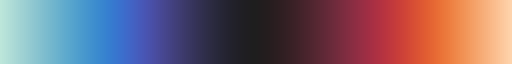

In [4]:
seaborn.color_palette("icefire", as_cmap=True)

<AxesSubplot:>

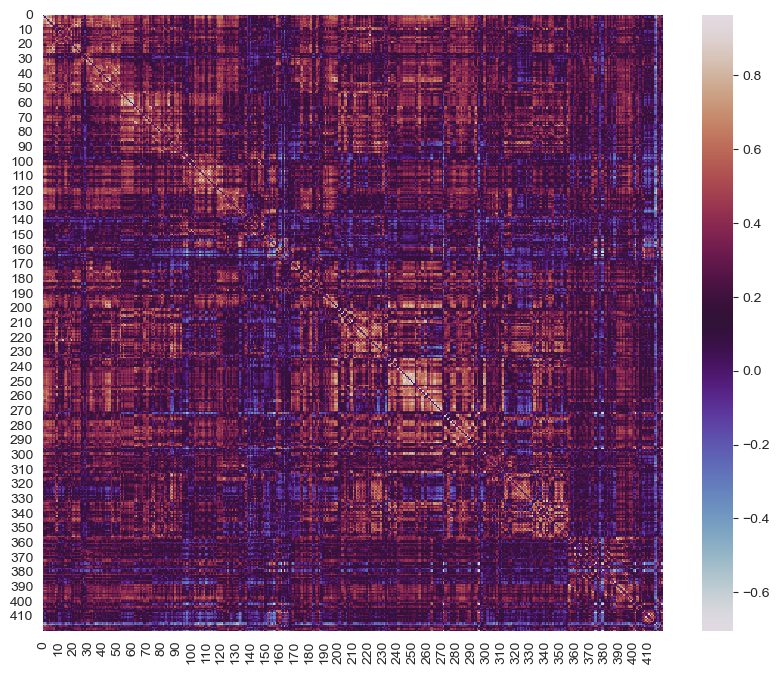

In [8]:
plt.figure(figsize=(10, 8))
seaborn.heatmap(d[0], cmap='twilight')

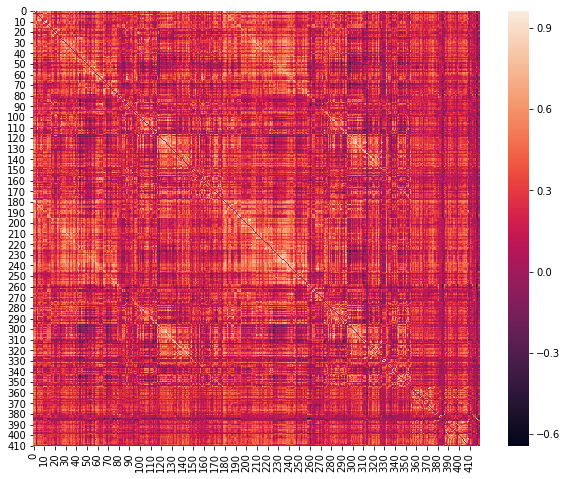

In [66]:
plt.figure(figsize=(10, 8))
seaborn.heatmap(open_eyes[5])